# Laplace Transforms

- Submitted 12/10/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- Text: *Differential Equations and Boundary Value Problems: Computing and Modeling* by C. Henry Edwards, David E. Penney and David Calvis, 5th Edition, Prentice Hall

## &sect; 7.1 Laplace Transform Methods

We're using the definition of the Laplace Transform, given a function $f(t)$ defined on $[0, \infty)$, 

$$
F(s) = \mathcal{L}\{f(t)\} = \int_0^\infty e^{-st}f(t)\, dt,
$$
for all values of $s$ for which the improper integral converges.

To ensure convergence, I'll call 

    assume( s > a )

so that Maxima knows how $s$ behaves while integrating out $t$.
### Prob 1

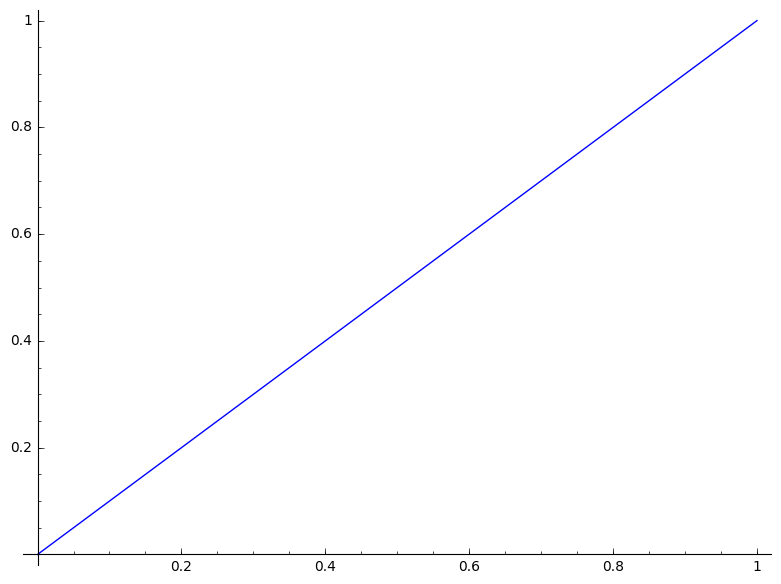

In [1]:
var("t")
f(t) = t
plot(f, (t, 0, 1))

In [2]:
var("s") 
assume( s>0 )
F(s) = integral( f(t)*exp(-s*t), t, 0, oo )
show(F)

s |--> s^(-2)

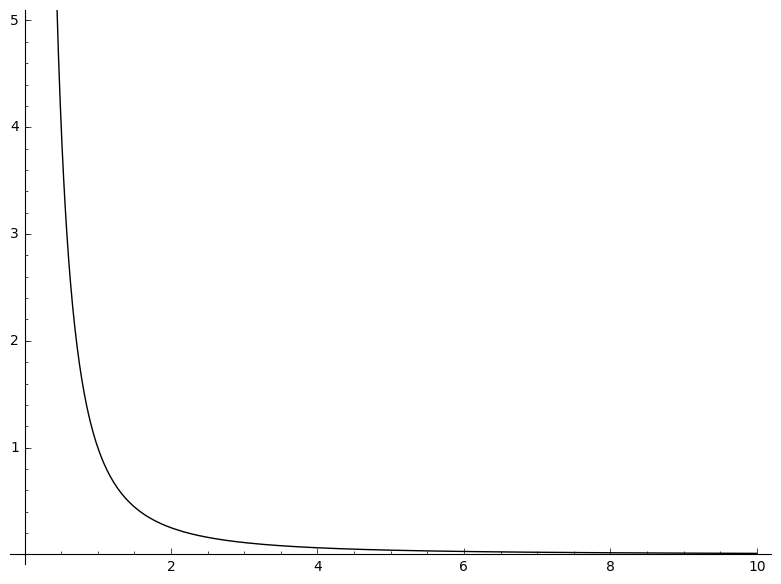

In [3]:
plot(F, (s, 0, 10), ymax = 5, color = 'black')

## Prob 4

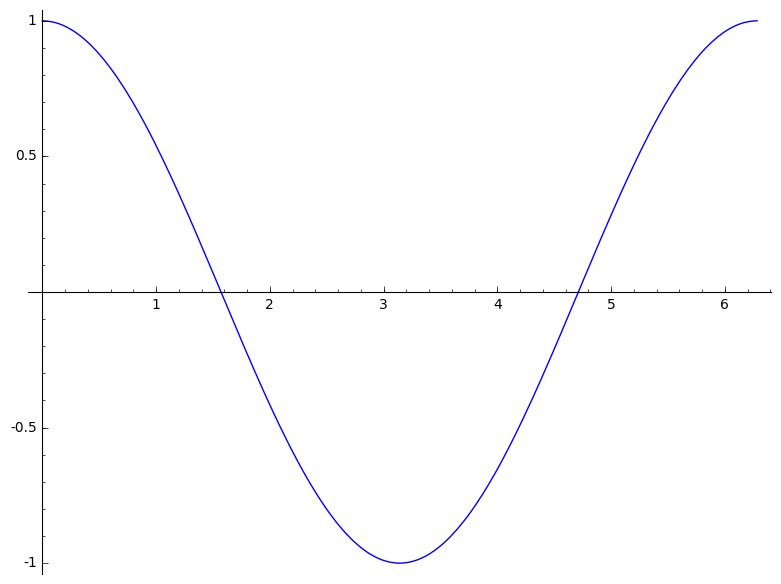

In [4]:
f(t) = cos(t)
plot(f, (t,0,2*pi))

In [5]:
assume( s>0 )
F(s) = integral( f(t)*exp(-s*t), t, 0, oo )
show(F)

s |--> s/(s^2 + 1)

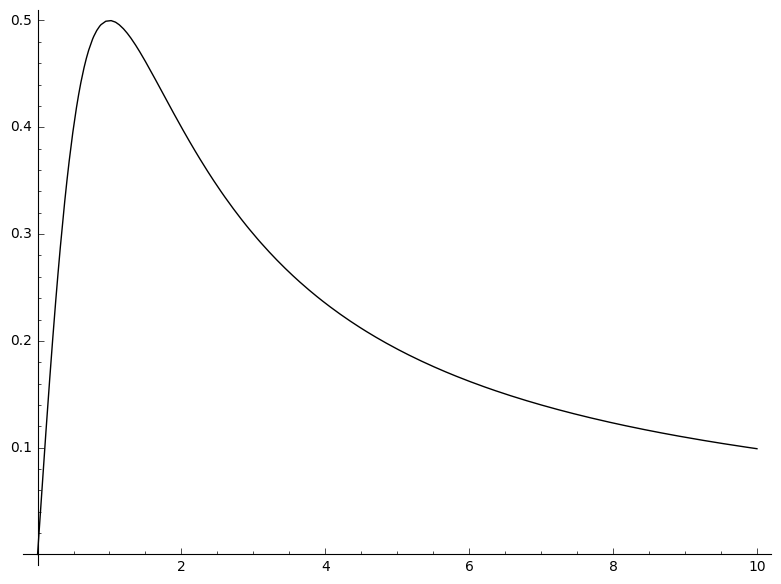

In [6]:
plot(F, (s, 0, 10), color = 'black')

## Prob 9

In this question I use `unit_step`, a [generalized function](https://en.wikipedia.org/wiki/Generalized_function) defined in [Maxima](https://ask.sagemath.org/question/8041/how-can-i-integrate-the-dirac_delta-and-heaviside-functions-in-sage/?answer=37536#post-id-37536) for symbolic calculation.

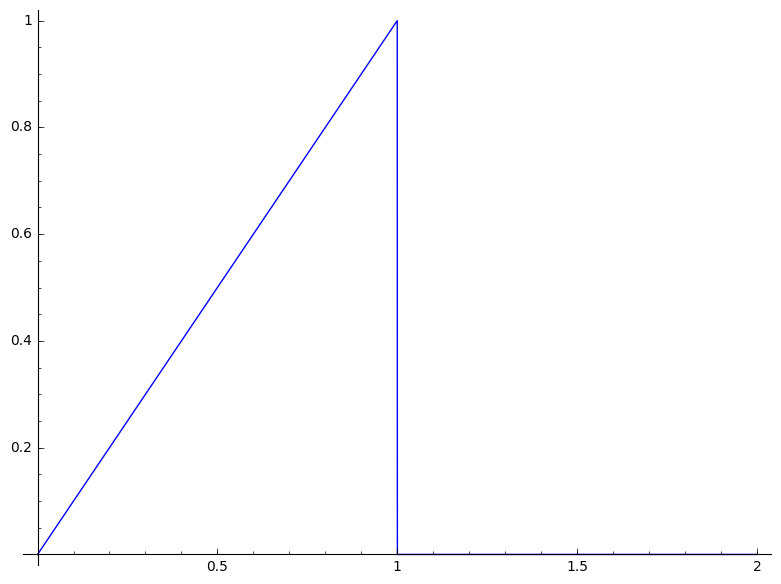

In [7]:
f(t) = t*(1-unit_step(t-1))
plot(f, (t,0,2))

In [8]:
F(s) = integral( f(t)*exp(-s*t), t, 0, oo)
show(F)

s |--> -e^(-s)/s - e^(-s)/s^2 + 1/s^2

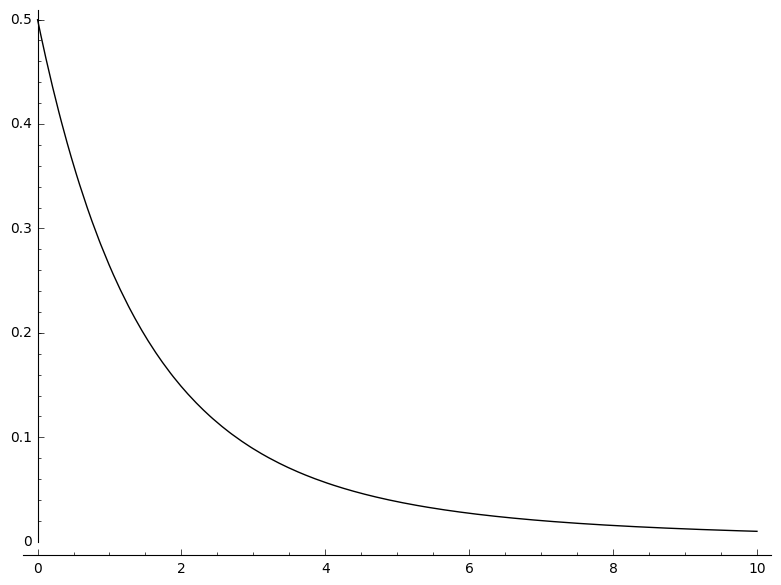

In [9]:
plot(F, (s, 0, 10), color = 'black')

### Prob 11

We have a factor of $\sqrt{\pi}$ from $\Gamma(n+1/2)$, where $n = 1$ in this case.

In [10]:
f(t) = sqrt(t) + 3*t
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F)

s |--> 1/2*(sqrt(pi)*s + 6*sqrt(s))/s^(5/2)

### Prob 13

This problem can also be tackled with a result about translation on the $s$-axis.

- If $F(s) = \mathcal{L}\{f(t)\}$ exists for $s > c$, then $\mathcal{L}\{e^{at}f(t)\}$ exists for $s > a + c$, and $\mathcal{L}\{e^{at}f(t)\} = F(s-a).$

In [11]:
f(t) = t - 2*e^(3*t)
assume( s>3 )
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F.partial_fraction(s))

s |--> -2/(s - 3) + 1/s^2

### Prob 15

In [12]:
f(t) = 1 + cosh(5*t)
F(s) = laplace(f, t, s)
show(F)

s |--> s/(s^2 - 25) + 1/s

In [13]:
# here's another way to see hyperbolic cosine as the sum of exponential functions
show(F.partial_fraction(s))

s |--> 1/2/(s + 5) + 1/2/(s - 5) + 1/s

### Prob 17

In [14]:
f(t) = (cos(2*t))^2
assume( s > 0 )
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F.partial_fraction(s))

s |--> 1/2*s/(s^2 + 16) + 1/2/s

Another way to compute this integral: use Euler's identity and properties of the exponential function to show 
$\cos^2(2t) = \frac12\cdot(1 - \cos(4t))$.

In [15]:
#whence
F(s) = (1/2)*(laplace(1, t, s) + laplace(cos(4*t), t, s))
show(F)

s |--> 1/2*s/(s^2 + 16) + 1/2/s

### Prob 21

One could also integrate by parts.

In [16]:
f(t) = t*cos(2*t)
assume( s > 0 )
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F.partial_fraction(s))

s |--> 1/(s^2 + 4) - 8/(s^2 + 4)^2

## Inverse Laplace Transforms

In general, every rational function is a Laplace transform iff (?) the degree of its numerator is less than that of its demoninator. We can identify inverse transforms by exploiting the linearity of the Laplace transform, and breaking down rational functions into sums of recognizable transforms 
- $\mathcal{L}\{t^a\}$ for $a > -1$
- $\mathcal{L}\{e^{at}\}$ for $a \in \mathbf{R}$
- $\mathcal{L}\{\cos(kt)\}$ (also cosh, sin, sinh)
- transforms of step functions

Again, linearity helps.

### Prob 23

$$ \mathcal{L}^{-1}\left\{\frac3{s^4}\right\} 
= \frac{3}{\Gamma(4)}\mathcal{L}^{-1}\left\{\frac{\Gamma(4)}{s^4}\right\} 
= \frac12 t^3. $$

Here's the computational method.

In [17]:
F(s) = 3/s^4
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> 1/2*t^3

### Prob 25

Fortunately, `SAGE` doesn't have a dictionary of inverse transforms for non-integer powers, so we get to manipulate the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function) a bit.

$$
\mathcal{L}^{-1}\left\{\frac1s - \frac2{s^{5/2}}\right\} 
= 1 - \frac2{\Gamma(5/2)}\mathcal{L}^{-1}\left\{\frac{\Gamma(5/2)}{s^{5/2}}\right\}
= 1 - \frac{8 t^{3/2}}{3\sqrt{\pi}}.
$$

### Prob 27

In [18]:
F(s) = 3/(s-4)
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> 3*e^(4*t)

### Prob 29

In [19]:
F(s) = (5-3*s)/(s^2 + 9)
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> -3*cos(3*t) + 5/3*sin(3*t)

### Prob 31

In [20]:
F(s) = (10*s-3)/(25-s^2)
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> -47/10*e^(5*t) - 53/10*e^(-5*t)

In [21]:
# equivalently
f(t) = -10*cosh(5*t) + (3/5)*sinh(5*t)
show(f)

t |--> -10*cosh(5*t) + 3/5*sinh(5*t)

## &sect; 7.2 Transformation of Initial Value Problems

We proceed with a result on the transforms of derivatives.

- Suppose the function $f(t)$ is continuous and piecewise smooth for $t \geq 0$ and is of exponential order as $t \to \infty$ (so there exist $M$, $c$, and $T$ such that $|f(t)| \leq Me^{ct}$ for $t \geq T$). Then $\mathcal{L}\{f'(t)\}$ exists for $s > c$ and 

$$
\mathcal{L}\{f'(t)\} = s\mathcal{L}\{f(t)\} - f(0) = sF(s) - f(0).
$$

- Then express higher derivatives by repeating the calculation. Notably,

$$
\mathcal{L}\{f''(t)\} = s\mathcal{L}\{f'(t)\} - f'(0) = s^2F(s) - s\,f(0) - f'(0).
$$

### Prob 1

Either solve by hand or call `desolve_laplace`, which takes 3 arguments:
- a linear differential equation in $x(t)$
- the "dependent variable" $x$ (where $x$ is really a function)
- initial conditions $t_0$, $x(t_0)$, and $x'(t_0)$

/Applications/SageMath/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


t |--> 5*cos(2*t)

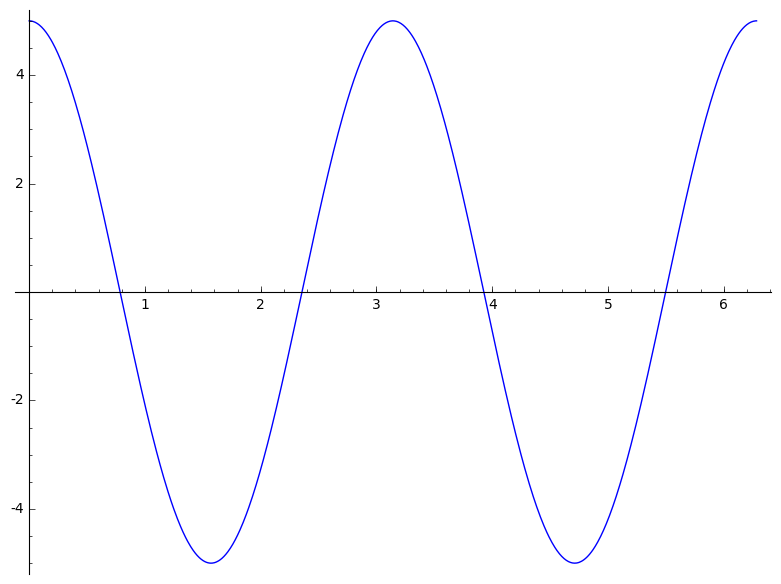

In [22]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) + 4*x(t) == 0, dvar = x, ics = [0,5,0])
show(x)
plot(x, (t, 0, 2*pi))

### Prob 3

t |--> 2/3*e^(2*t) - 2/3*e^(-t)

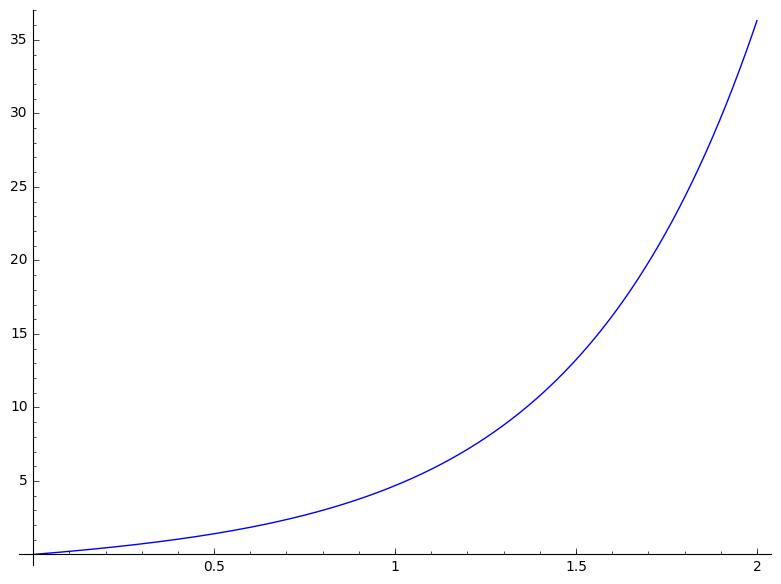

In [23]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) - diff(x,t) - 2*x(t) == 0, dvar = x, ics = [0,0,2])
show(x)
plot(x, (t, 0, 2))

### Prob 5

t |--> -1/3*sin(2*t) + 2/3*sin(t)

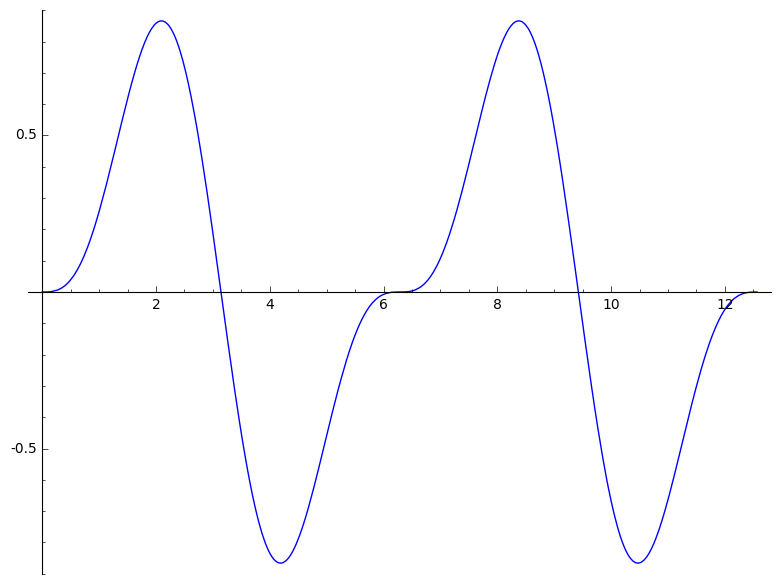

In [24]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) + x(t) == sin(2*t), dvar = x, ics = [0,0,0])
show(x)
plot(x, (t, 0, 4*pi))

### Prob 17

For transforms of the form $R(s)/sQ(s)$, we exploit the fact that 

$$
\mathcal{L}\left\{\int_0^tf(\xi)\,d\xi\right\} = \frac{F(s)}{s}, \quad \text{where $F(s) = \mathcal{L}\{f(t)\}$}.
$$

In this way, given some $R(s)/sQ(s)$, we are only required to find $f(t)$ such that $\mathcal{L}\{f(t)\} = R(s)/Q(s)$. 

Integrating $f(\xi)$ (with $\xi$ as a dummy variable), we obtain 

$$
\int_0^tf(\xi)\,d\xi = \mathcal{L}^{-1}\left\{\frac{R(s)}{sQ(s)}\right\}.
$$

We find the inverse tranform of $\frac{1}{{\left(s - 3\right)} s}$.

In [25]:
f(t) = inverse_laplace(1/(s-3), s, t)
var("xi")
soln(t) = integral(f(xi), xi, 0, t)
show(soln)

t |--> 1/3*e^(3*t) - 1/3

In [26]:
# equivalently, we can charge ahead with partial fraction decomposition
F(s) = 1/(s*(s-3))
show(F.partial_fraction(s))

s |--> 1/3/(s - 3) - 1/3/s

In [27]:
# then inverse transform to the time domain
f(t) = inverse_laplace(F, s, t)
show(f)

t |--> 1/3*e^(3*t) - 1/3

### Prob 21
We find the inverse transform of $\frac{1}{s^2(s^2+1)}$.

In [28]:
# either we integrate twice 
f(t)  = inverse_laplace(1/(s^2 + 1), s, t)
assume( t>0 )
integrate(integrate(f(xi), xi, 0, t)(xi), xi, 0, t)

t - sin(t)

In [29]:
# or use partial fraction decomposition
F(s) = 1/(s^2*(s^2 + 1))
show(F.partial_fraction(s))

s |--> -1/(s^2 + 1) + 1/s^2

In [30]:
f(t) = inverse_laplace(F, s, t)
show(f)

t |--> t - sin(t)

### Prob 25
We'll obtain $\mathcal{L}\{\sin kt \}$ from $\mathcal{L}\{\cos kt \}$, exploiting the linearity of $\mathcal{L}$ and the result $\mathcal{L}\{f'(t)\} = sF(s) - f(0)$.

By the chain rule, $$\frac{d}{dt} \sin kt = k \cos kt.$$

Therefore $$\mathcal{L}\left\{\frac{d}{dt} \sin kt\right\} = k \frac{s}{s^2 + k^2}.$$

Also $$\mathcal{L}\left\{\frac{d}{dt} \sin kt\right\} = s\mathcal{L}\{\sin kt\} - \sin(k\cdot0).$$

Thus $$\frac{k}{s^2 + k^2} = \mathcal{L}\{\sin kt \}.$$


### Prob 28
We'll show 
$$\mathcal{L}\{t \cos kt \} = \frac{s^2 - k^2}{(s^2 + k^2)^2},$$
by evaluating both sides of the identity 
$$ \mathcal{L}\{f''(t)\} = s^2F(s) - sf(0) - f'(0).$$

In [31]:
var("k")
f(t) = t*cos(k*t)
# evaluate the LHS in the time domain
show(diff(f, t, 2)(t))

-k^2*t*cos(k*t) - 2*k*sin(k*t)

In [32]:
F = function('F')(s)
# evaluate the RHS in the Laplace domain
show(s^2*F(s) - s*f(0) - diff(f,t)(0))

s^2*F(s) - 1

In [33]:
# push the LHS to the Laplace domain, 
# set equal, and solve for F
solve(-k^2*F(s) - 2*k*laplace(sin(k*t), t, s) == s^2*F(s) - 1, F)

[F(s) == -(k^2 - s^2)/(k^4 + 2*k^2*s^2 + s^4)]

Simplifying, we see $F(s) = (s^2 - k^2)/(s^2 + k^2)^2$. Recalling that $f(t) = t \cos kt$, we have 

$$\mathcal{L}\{t \cos kt\} = \frac{s^2 - k^2}{(s^2 + k^2)^2}$$ 

as desired.

## &sect; 7.3 Translation and Partial Fractions

How can we handle translation in Laplace space (i.e., shifts along the $s$-axis)? We must recall 
- $\mathcal{L}\{e^{at}f(t)\} = F(s-a)$ on $s > a + c$ (given $F(s) = \mathcal{L}\{f(t)\}$ on $s > c$).

### Prob 1

We find $\mathcal{L}\{t^4 e^{\pi t}\}$.

In [34]:
F(s) = laplace(t^4, t, s)
show(F(s-pi))

-24/(pi - s)^5

In [35]:
# checking work
bool(F(s-pi) == laplace(t^4*e^(pi*t), t, s))

True

### Prob 3

We find $\mathcal{L}\{e^{-2 \, t} \sin\left(3 \, \pi t\right)\}$.

In [36]:
F(s) = laplace(sin(3* pi*t), t, s)
show(F(s+2))

3*pi/(9*pi^2 + (s + 2)^2)

In [37]:
#checking work
bool(F(s+2) == laplace(e^(-2*t)*sin(3*pi*t), t, s))

True

### Prob 4

We desire $\mathcal{L}\left\{e^{-t/2}\cos\left(-\frac{1}{4} \, \pi + 2 \, t\right)\right\}$. 

Recalling $\cos(\alpha + \beta) = \cos\alpha\cos\beta - \sin\alpha\sin\beta$, from the real part of the equation $ e^{i(\alpha + \beta)} = e^{i\alpha}e^{i\beta}$, this problem boils down to finding

$$
F(s) = \mathcal{L}\left\{\frac{\sqrt{2}}2\left(\cos 2t  + \sin 2t\right)\right\}
$$ 

and evaluating $F(s+1/2)$.

In [38]:
F(s) = laplace(cos(2*t - pi/4), t, s)
show(F(s+1/2))

(sqrt(2)*(2*s + 1) + 4*sqrt(2))/((2*s + 1)^2 + 16)

In [39]:
# checking work
bool(F(s+1/2) == laplace(e^(-t/2)*cos(2*t - pi/4), t, s))

True

### Prob 5

$$
\frac3{2s-4} 
    = \frac32 \cdot \frac{1}{s-2}
    \overset{\mathcal{L}^{-1}}{\implies} 
    \frac32 e^{2t}.
$$

### Prob 7

$$
\frac1{s^2 + 4s + 4}
    = \frac1{(s+2)^2}
    \overset{\mathcal{L}^{-1}}{\implies} 
    e^{-2t} t.
$$


### Prob 8

$$
\frac{s+2}{s^2 + 4s + 5}
    = \frac{s+2}{(s+2)^2 +1}
    \overset{\mathcal{L}^{-1}}{\implies} 
    e^{-2t} \cos t.
$$

### Prob 13

We find $\mathcal{L}^{-1}\left\{ \frac{5 - 2 s}{s^{2} + 7 s + 10}\right\}.$

In [40]:
F(s) = (5-2*s)/(s^2 + 7*s + 10)
show(F.partial_fraction(s))

s |--> -5/(s + 5) + 3/(s + 2)

In [41]:
f(t) = inverse_laplace(F, s, t)
show(f)

t |--> 3*e^(-2*t) - 5*e^(-5*t)

### Prob 21

We find $\mathcal{L}^{-1}\left\{ \frac{s^{2} + 3}{{\left({\left(s + 1\right)}^{2} + 1\right)}^{2}} \right\}.$

In [42]:
F(s) = (s^2 + 3)/((s+1)^2 + 1)^2
show(F.partial_fraction(s))

s |--> 1/(s^2 + 2*s + 2) - (2*s - 1)/(s^2 + 2*s + 2)^2

In [43]:
f(t) = inverse_laplace(F, s, t)
show(f)

t |--> -3/2*t*cos(t)*e^(-t) - t*e^(-t)*sin(t) + 5/2*e^(-t)*sin(t)

### Prob 23

We show $\mathcal{L}^{-1}\left\{ \frac{s^{3}}{4 \, a^{4} + s^{4}} \right\} = \cosh at \, \cos at.$

In [44]:
var("a")
F(s) = s^3/(s^4 + 4*a^4)
show(F.partial_fraction(s))

s |--> 1/2*(a + s)/(2*a^2 + 2*a*s + s^2) - 1/2*(a - s)/(2*a^2 - 2*a*s + s^2)

In [45]:
assume( a>0 )
f(t) = inverse_laplace(F, s, t)
show(f)

t |--> 1/2*cos(a*t)*e^(a*t) + 1/2*cos(a*t)*e^(-a*t)

In [46]:
# QED, but we could also
# check equality at 100 discrete points
bool([f(i) == cosh(a*i)*cos(a*i) for i in range(100)])

True

### Prob 27

We solve the IVP $x'' + 6x' + 25x = 0$, with $x(0) = 2$ and $x'(0) = 3$.

In [47]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) +6*diff(x,t) + 25*x(t) == 0, dvar = x, ics = [0,2,3])
show(x)

t |--> 1/4*(8*cos(4*t) + 9*sin(4*t))*e^(-3*t)

t |--> 1/4*(8*cos(4*t) + 9*sin(4*t))*e^(-3*t)

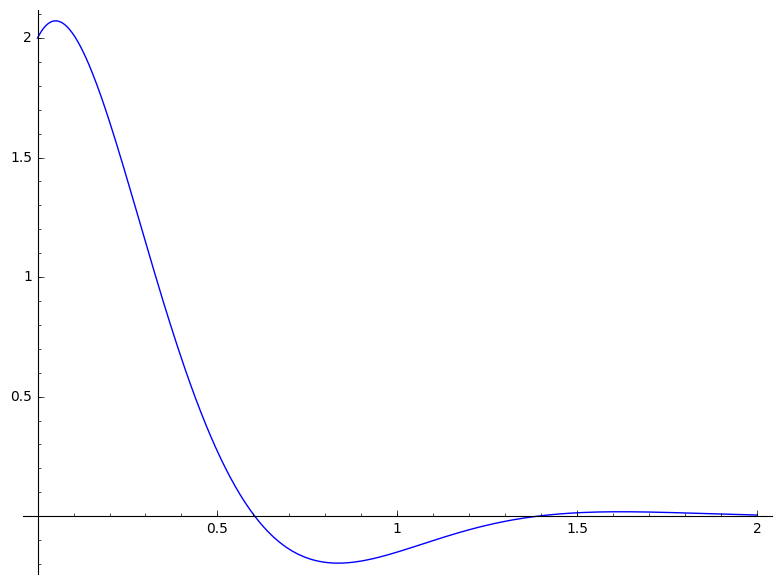

In [48]:
# equivalently
X(s) = (2*s + 15)/((s+3)^2 + 16)
x(t) = inverse_laplace(X(s), s, t)
show(x)
plot(x, (t, 0, 2))

### Prob 29

We solve the IVP $x'' - 4x = 3t$, given an initially passive system $x'(0) = x(0) = 0$.

In [49]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) - 4*x(t) == 3*t, dvar = x, ics = [0,0,0])
show(x)

t |--> -3/4*t + 3/16*e^(2*t) - 3/16*e^(-2*t)

t |--> -3/16*(4*t*e^(2*t) - e^(4*t) + 1)*e^(-2*t)

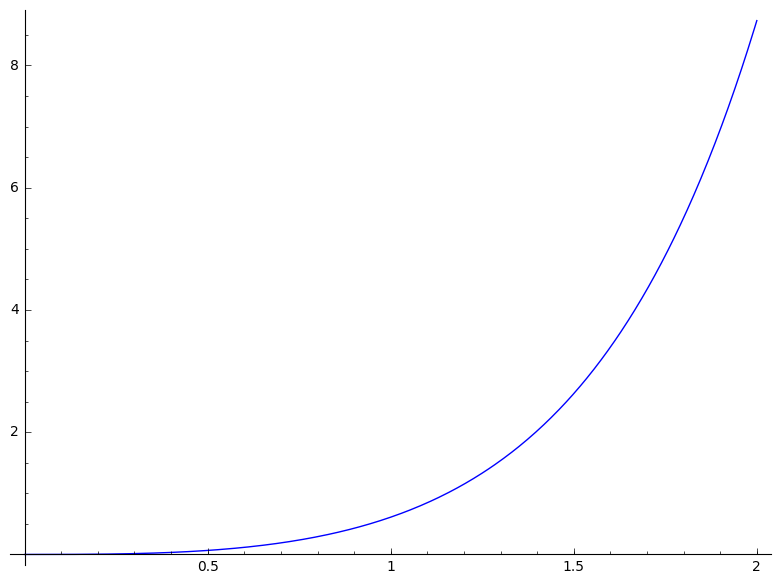

In [50]:
# equivalently
F(s) = 3/(s^2 - 4)
f(t) = inverse_laplace(F(s), s, t)
x(t) = integrate(integrate(f(xi), xi, 0, t)(xi), xi, 0, t)
show(x)
plot(x, (t, 0, 2))

## &sect; 7.4 Derivatives, Integrals, and Products of Transforms

Regarding products, the convolution $f * g$ of the piecewise continuous functions $f$ and $g$ is defined for $t \geq 0$ as
$$
(f * g)(t) = \int_0^t f(\tau)g(t-\tau)\, d\tau.
$$

Considering derivatives, we have that if $f(t)$ is a piecewise continuous function, defined on $t \geq 0$, and bounded by some multiple of $e^{ct}$ as $t \to \infty$, then 

$$
\mathcal{L}\{t\cdot f(t)\} = -\frac{d}{ds}[F(s)].
$$

Lastly, for antiderivates, we'll look at improper integrals of transforms from $s$ to $\infty$. If 
- $f(t)$ is piecewise continuous for $t\geq 0$,
- $\lim_{t \to 0^+} f(t)/t$ exists (and is finite), and
- $f(t)$ is bounded by some multiple of $e^{ct}$ as $t \to \infty$, then

$$
\mathcal{L}\left\{\frac{f(t)}t \right\} = \int_s^\infty F(\sigma)\, d\sigma.
$$

### Prob 2

Let $f(t) = t$ and $g(t) = e^{at}$. We'll find $f * g$.

In [51]:
var("a tau")
convol(t) = integrate(tau*e^(a*(t-tau)), tau, 0, t)
show(convol(t))

-(a*t + 1)/a^2 + e^(a*t)/a^2

Simplifying, 
$$
f * g = \frac1{a^2}\left(e^{at} - at - 1\right).
$$

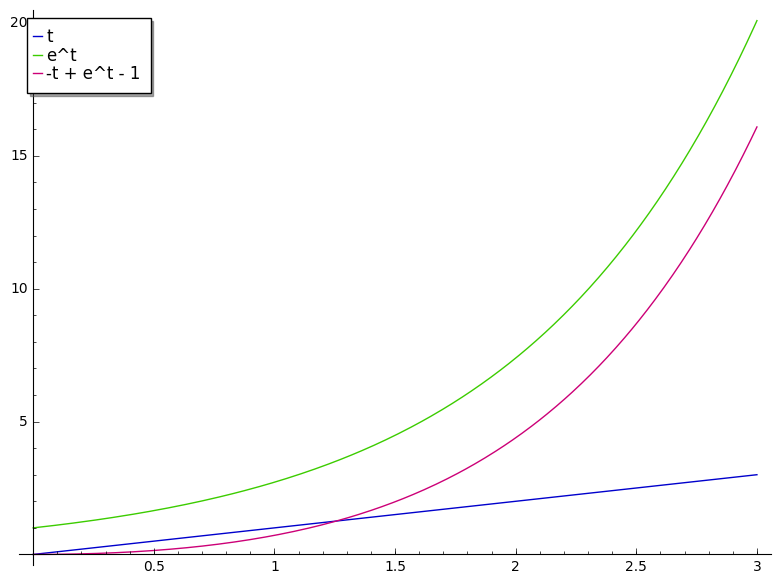

In [52]:
plot([t, e^t, e^t - t - 1], (t, 0, 3), legend_label = 'automatic')

### Prob 3

Let $f(t) = g(t) = \sin(t)$. We'll find $f * g$.

In [53]:
var("a tau")
convol(t) = integrate(sin(tau)*sin(t-tau), tau, 0, t)
show(convol(t))

-1/2*t*cos(t) + 1/2*sin(t)

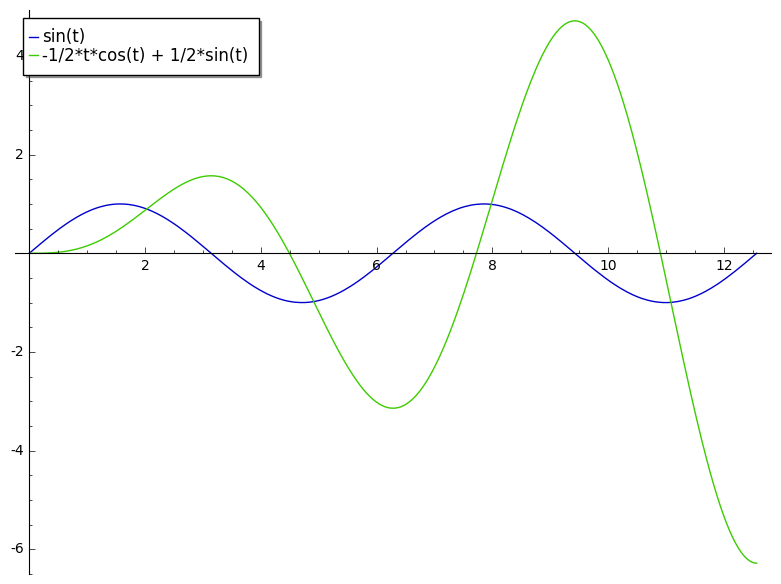

In [54]:
plot([sin(t), 1/2*(sin(t) - t*cos(t))], (t, 0, 4*pi), legend_label = 'automatic')

### Prob 7

We'll apply the convolution theorem to determine the inverse Laplace transform of $H(s) = \frac{1}{s(s-3)}$.

That is, given two transforms $F(s)$ and $G(s)$, we have 

$$
\mathcal{L}^{-1}\{F(s)\cdot G(s)\} = f(t) * g(t) \quad \text{for $t \geq 0$}.
$$

In [55]:
F(s) = 1/s
G(s) = 1/(s-3)
f(t) = inverse_laplace(F, s, t)
g(t) = inverse_laplace(G, s, t)
h(t) = integrate(f(tau)*g(t-tau), tau, 0, t)
show(h)

t |--> 1/3*e^(3*t) - 1/3

In [56]:
# checking work
H(s) = 1/(s*(s-3))
h(t) = inverse_laplace(H, s, t)
show(h)

t |--> 1/3*e^(3*t) - 1/3

### Prob 9

We'll find the inverse Laplace transform for $H(s) = \frac{1}{(s^2 + 9)^2}$.

In [57]:
f(t) = inverse_laplace(1/(s^2 + 9), s, t)
g(t) = f(t)
show(f)

t |--> 1/3*sin(3*t)

In [58]:
h(t) = integrate(f(tau)*g(t-tau), tau, 0, t)
# apply angle sum and power reduction for sine
# integration is linear, so evaluate the summands
# then recognize angle sum for sine and simplify
show(h)

t |--> -1/18*t*cos(3*t) + 1/54*sin(3*t)

In [59]:
# checking work
H(s) = 1/(s^2 + 9)^2
h(t) = inverse_laplace(H, s, t)
show(h)

t |--> -1/18*t*cos(3*t) + 1/54*sin(3*t)

### Prob 13

We'll find the inverse Laplace transform for 
$H(s) = \frac{s}{(s-3)(s^2 + 1)} = \frac{1}{s-3}\cdot\frac{s}{s^2 + 1}$.

In [60]:
f(t) = inverse_laplace(1/(s-3), s, t)
g(t) = inverse_laplace(s/(s^2 + 1), s, t)
show(f)
show(g)

t |--> e^(3*t)

t |--> cos(t)

t |--> -3/10*cos(t) + 3/10*e^(3*t) + 1/10*sin(t)

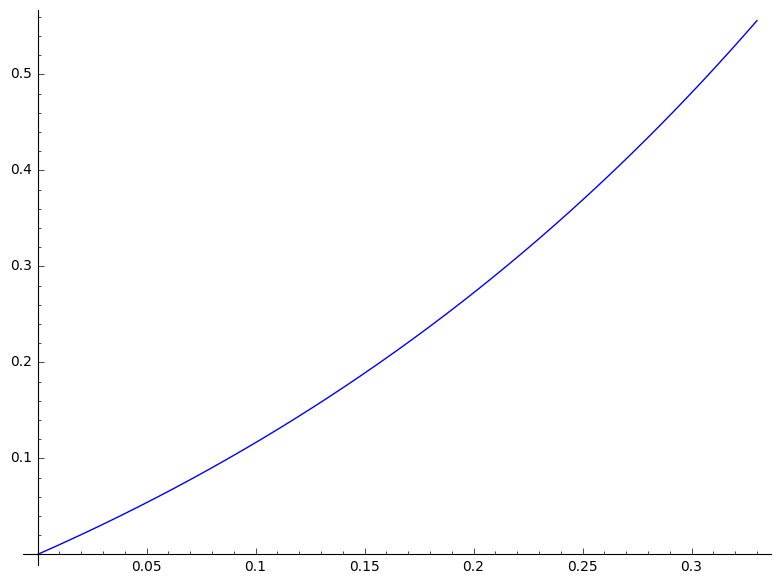

In [61]:
# now convolute cosine and an exponential function
h(t) = integrate(f(tau)*g(t-tau), tau, 0, t)
show(h)
plot(h, (t, 0, 0.33))

In [62]:
# checking work
H(s) = s/((s-3)*(s^2 + 1))
h(t) = inverse_laplace(H, s, t)
show(h)

t |--> -3/10*cos(t) + 3/10*e^(3*t) + 1/10*sin(t)

### Prob 17

We'll find the Laplace transform for 
$h(t) = t\cdot e^{2t}\cos{3t}$, writing $f(t) = e^{2t}\cos{3t}$.

In [63]:
f(t) = e^(2*t)*cos(3*t)
F(s) = laplace(f, t, s)
H(s) = diff(F, s)(s)
show(H)

s |--> -2*(s - 2)^2/(s^2 - 4*s + 13)^2 + 1/(s^2 - 4*s + 13)

In [64]:
# checking work
h(t) = t*e^(2*t)*cos(3*t)
H(s) = laplace(h, t, s)
print H

s |--> 2*(s - 2)^2/(s^2 - 4*s + 13)^2 - 1/(s^2 - 4*s + 13)


In [65]:
# compare CSA solution (LHS) to hand derivation (RHS)
# aside: how many points determine a rational function?
# I'm checking at 29 points here, seems sufficient
bool([2*(i - 2)^2/(i^2 - 4*i + 13)^2 - 1/(i^2 - 4*i + 13) == 2*(i^3-i^2+9)/((i-3)*(i^2+9)) for i in [0.1 .. 2.9]])

True

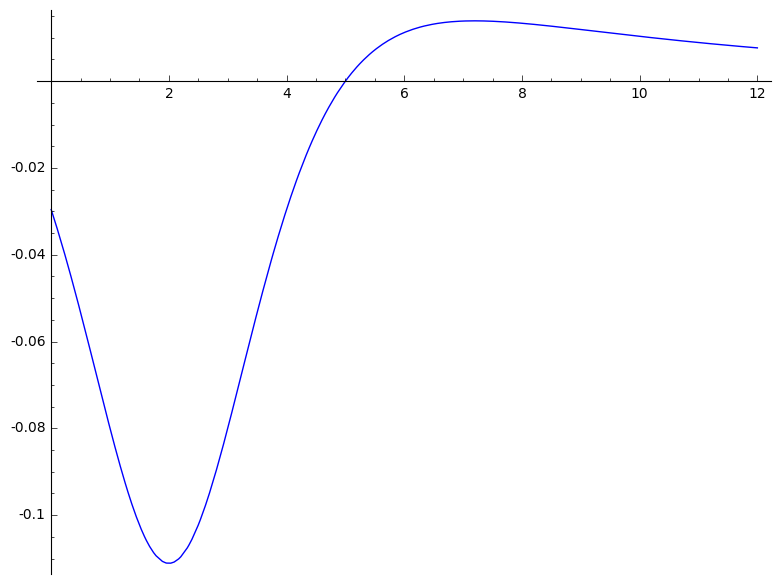

In [66]:
plot(H, (s, 0, 12))

### Prob 21

We find $\mathcal{L}\left\{ \frac{e^{3t} - 1}t \right\}$, writing $f(t) = e^{3t} - 1$ and applying

$$
\mathcal{L}\left\{ \frac{f(t)}t \right\} = \int_s^\infty F(\sigma)\, d\sigma.
$$

In [2]:
var("s t")
f(t) = e^(3*t) - 1
F(s) = laplace(f, t, s)
assume( s > 3 )
show(F)

s |--> 1/(s - 3) - 1/s

In [6]:
var("sigma")
H(s) = integrate(F(sigma), sigma, s, oo, algorithm = 'sympy')
show(H)

s |--> -log(s - 3) + log(s)

### Prob 23

In [10]:
F(s) = log(s-2) - log(s+2)
H(s) = diff(F, s)
h(t) = inverse_laplace(H, s, t)
f(t) = -h/t
show(f)

t |--> -(e^(2*t) - e^(-2*t))/t

Equivalently, $f(t) = -\frac{2 \sinh{2t}}{t}$.

### Prob 29
We'll solve the DE $tx'' + (t-2)x' + x = 0$ given passive initial conditions.

Applying the $\mathcal{L}$ operator to both sides of the equation, we have a first order seperable DE in $X(s)$.

$$
X'\cdot(s^2 + s) + X\cdot4s = 0.
$$

It follows that $X(s) = \frac{1}{(s+1)^4}$, whence 
$$
    x(t) = \frac{t^3 e^{-t}}{\Gamma(4)} = \frac1{6}t^3 e^{-t}
$$

### Prob 36

We'll show that the 2nd order non-homogenous DE
$
x'' + 4x = f(t)
$
has solution

$$x(t) = \frac12 \int_0^t f(t-\tau) \sin 2\tau \, d\tau.$$

Applying the $\mathcal{L}$ operator to both sides of the DE, then       isolating $X(s)$, we have

$$
X = \frac{F(s)}{s^2 + 4} = \frac12 \cdot F(s) \cdot \frac{2}{s^2 + 4}.
$$

By the convolution theorem,

$$
\frac12\mathcal{L}^{-1}\left\{F(s) \cdot \frac{2}{s^2 + 4}\right\} 
= \frac12 \int_0^t f(t-\tau) \sin 2\tau \, d\tau.
$$

QED.